In [1]:
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy import stats
import statsmodels.api as sm
from ipywidgets import widgets

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
res6 = pd.read_csv("result6weekxboost3.csv", sep=",")
composed2 = []

for row in res6.itertuples():
    newrow = []
    idx, id, y = row
    region, date, hour, pred_hour = id.split("_")
    d = map(int, date.split("-"))
    newrow.append(d[0])
    newrow.append(d[1])
    newrow.append(d[2])
    #newrow = map(int, date.split("-"))
    newrow.append(int(hour))
    newrow.append(int(pred_hour))
    newrow.append(int(region))
    newrow.append(y)
    composed2.append(newrow)
composed2 = pd.DataFrame(data=composed2, columns=["year", "month", "day", "hour", "pred_hour", "region", "y"])
#print composed2

for i in range(6):
    num = i+1
    newd = composed2[composed2['pred_hour']==num]
    d = newd['y']

    if i==0: 
        dmain = pd.DataFrame(data=newd, columns=["year", "month", "day", "hour", "region"])
    ypred = 'pred_'+str(num)
    dmain[ypred] = newd['y'].values
dmain.head()

year  month  day  hour  region     pred_1     pred_2     pred_3     pred_4  \
0  2016      5   31    23    1075  21.484369   9.416017   9.241228   4.025157   
1  2016      6    1     0    1075   6.616960   8.009550   7.779006   6.293310   
2  2016      6    1     1    1075   2.026302   3.738899   5.327038  13.354498   
3  2016      6    1     2    1075   0.478068   3.731574  15.397022  26.266211   
4  2016      6    1     3    1075   2.340415  11.881712  28.472683  54.482193   

      pred_5     pred_6  
0   3.763823  10.003887  
1  13.912595  26.523426  
2  24.279642  50.888344  
3  52.565277  83.431290  
4  86.565491  66.195251

In [4]:
reg102 = pd.read_csv("102_regions.csv", sep=",",header=None) 
file_june = ['agrig_yellow_tripdata_2016-05.csv', 'agrig_yellow_tripdata_2016-06.csv']
data_all1 = pd.DataFrame()
dataMain = pd.DataFrame()

j=0
for f in file_june:
    k=0
    data_h = pd.DataFrame()
    data = pd.read_csv(f, sep=",", index_col=False) 
    dataMain = pd.concat([dataMain, data])

dataMain = dataMain.drop('Unnamed: 0', 1)

for r in reg102[1].index:  
    data_reg = pd.DataFrame(data = dataMain[dataMain['region']==reg102[1][r]])
    data_all1 = pd.concat([data_all1, data_reg])

yt = data_all1['count of trips']
for num in range(6):        
    a = np.roll(yt, -(num+1))
    colname = 'y_Tplus'+str(num+1)
    data_all1[colname] = a

#data_main = pd.concat([data_main, data_reg[data_reg['T']>168]])
ind=[]
for i in range(1464):
    ind.append(i+1)

data_main = pd.DataFrame()
for r in reg102[1].index:  
    data_reg = pd.DataFrame(data = data_all1[data_all1['region']==reg102[1][r]])
    #print reg102[1][r]
    data_reg['T'] = ind
    data_main = pd.concat([data_main, data_reg])

date53123 = data_main[(data_main['month']==5)&(data_main['day']==31)&(data_main['hour']==23)]['T'].mean()
date63017 = data_main[(data_main['month']==6)&(data_main['day']==30)&(data_main['hour']==17)]['T'].mean()
data_j = data_main[(data_main['T']>=date53123)&(data_main['T']<=date63017)]

a = pd.merge(data_j, dmain, how='inner', on=['year',  'month',  'day',  'hour',  'region'], left_on=None, right_on=None,
         left_index=False, right_index=False, sort=False, copy=True, indicator=False)
data_all2 = pd.DataFrame(data=a)
data_all2.head()

year  month  day  hour  region  count of trips  y_Tplus1  y_Tplus2  \
0  2016      5   31    23    1075              34        26        14   
1  2016      6    1     0    1075              26        14         5   
2  2016      6    1     1    1075              14         5         2   
3  2016      6    1     2    1075               5         2         1   
4  2016      6    1     3    1075               2         1         7   

   y_Tplus3  y_Tplus4  y_Tplus5  y_Tplus6    T     pred_1     pred_2  \
0         5         2         1         7  744  21.484369   9.416017   
1         2         1         7        23  745   6.616960   8.009550   
2         1         7        23        34  746   2.026302   3.738899   
3         7        23        34        72  747   0.478068   3.731574   
4        23        34        72        54  748   2.340415  11.881712   

      pred_3     pred_4     pred_5     pred_6  
0   9.241228   4.025157   3.763823  10.003887  
1   7.779006   6.293310  13.912595  26.523426  
2   5.327038  13.354498  24.279642  50.888344  
3  15.397022  26.266211  52.565277  83.431290  
4  28.472683  54.482193  86.565491  66.195251

In [5]:
data1=pd.DataFrame(data=data_all2)
date= []
for i in data1.index:
    d = str(data1['year'].loc[i]).replace('\n','')+'-'+str(data1['month'].loc[i]).replace('\n','')+'-'+str(data1['day'].loc[i]).replace('\n','')+' '+str(data1['hour'].loc[i]).replace('\n','')+':00:00'
    date.append(d)
data1['Date'] = date

data1['Date'] = pd.to_datetime(data1['Date'])
data1 = data1.set_index('Date')
print data1.head()

                     year  month  day  hour  region  count of trips  y_Tplus1  \
Date                                                                            
2016-05-31 23:00:00  2016      5   31    23    1075              34        26   
2016-06-01 00:00:00  2016      6    1     0    1075              26        14   
2016-06-01 01:00:00  2016      6    1     1    1075              14         5   
2016-06-01 02:00:00  2016      6    1     2    1075               5         2   
2016-06-01 03:00:00  2016      6    1     3    1075               2         1   

                     y_Tplus2  y_Tplus3  y_Tplus4  y_Tplus5  y_Tplus6    T  \
Date                                                                         
2016-05-31 23:00:00        14         5         2         1         7  744   
2016-06-01 00:00:00         5         2         1         7        23  745   
2016-06-01 01:00:00         2         1         7        23        34  746   
2016-06-01 02:00:00         1         7   

In [33]:
print data1[(data1['hour']==23)&(data1['region']==1075)].index.values

['2016-05-31T23:00:00.000000000' '2016-06-01T23:00:00.000000000'
 '2016-06-02T23:00:00.000000000' '2016-06-03T23:00:00.000000000'
 '2016-06-04T23:00:00.000000000' '2016-06-05T23:00:00.000000000'
 '2016-06-06T23:00:00.000000000' '2016-06-07T23:00:00.000000000'
 '2016-06-08T23:00:00.000000000' '2016-06-09T23:00:00.000000000'
 '2016-06-10T23:00:00.000000000' '2016-06-11T23:00:00.000000000'
 '2016-06-12T23:00:00.000000000' '2016-06-13T23:00:00.000000000'
 '2016-06-14T23:00:00.000000000' '2016-06-15T23:00:00.000000000'
 '2016-06-16T23:00:00.000000000' '2016-06-17T23:00:00.000000000'
 '2016-06-18T23:00:00.000000000' '2016-06-19T23:00:00.000000000'
 '2016-06-20T23:00:00.000000000' '2016-06-21T23:00:00.000000000'
 '2016-06-22T23:00:00.000000000' '2016-06-23T23:00:00.000000000'
 '2016-06-24T23:00:00.000000000' '2016-06-25T23:00:00.000000000'
 '2016-06-26T23:00:00.000000000' '2016-06-27T23:00:00.000000000'
 '2016-06-28T23:00:00.000000000' '2016-06-29T23:00:00.000000000']


In [45]:
dates = ['2016-06-01' , '2016-06-02', '2016-06-03', '2016-06-04', '2016-06-05', '2016-06-06', '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10', '2016-06-11', '2016-06-12', '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16', '2016-06-17', '2016-06-18', '2016-06-19', '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24', '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28', '2016-06-29']
hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
predhours = ['1','2','3','4','5','6']

In [12]:
year = 2016
month = 5
day = 31
hour = 23
predhour = 1

In [68]:
namereg = []
for r in reg102[1].values:
    namereg.append(str(r))
rs = pd.read_csv("regions.csv", sep=";") 

def plot_for_time(region_data):
    fig=plt.figure(figsize=(16, 8))

    map = Basemap(llcrnrlon=-74.0222464,llcrnrlat=40.6387194,urcrnrlon=-73.7666796,urcrnrlat=40.8484244)

    #lons, lats, x, y = map.makegrid(70, 70, returnxy=True)

    ax = fig.add_subplot(131)
    ax.set_title('Real Map')
    x, y = map(region_data['lon_center'],region_data['lat_center'])
    map.scatter(x,y, 50,marker='s', c=region_data["realtrips"], cmap=cm.Greys, alpha=0.7)

    map.arcgisimage(service='World_Street_Map', xpixels = 1000, verbose= True)

    ax = fig.add_subplot(132)
    ax.set_title('Predicted Map')

    map2 = Basemap(llcrnrlon=-74.0222464,llcrnrlat=40.6387194,urcrnrlon=-73.7666796,urcrnrlat=40.8484244)

    #x, y = map(lons, lats)
    x, y = map2(region_data['lon_center'],region_data['lat_center'])
    map2.scatter(x,y, 50,marker='s', c=region_data["predtrips"], cmap=cm.Greys, alpha=0.7)
    map2.arcgisimage(service='World_Street_Map', xpixels = 1000, verbose= True)

    ax = fig.add_subplot(133)
    ax.set_title('Difference (|Real - Predicted|) map')

    map3 = Basemap(llcrnrlon=-74.0222464,llcrnrlat=40.6387194,urcrnrlon=-73.7666796,urcrnrlat=40.8484244)

    #x, y = map(lons, lats)
    x, y = map3(region_data['lon_center'],region_data['lat_center'])
    map3.scatter(x,y, 50,marker='s', c=abs(region_data["predtrips"]-region_data["realtrips"]), cmap=cm.Greys, alpha=0.7)
    map3.arcgisimage(service='World_Street_Map', xpixels = 1000, verbose= True)

    plt.show()

selected_data = {"date": (2016, 1, 1), "hour": 0, "predhour": 1}

def select_map(date, hour, predhour, **kwards):
    selected_data["date"] = map(int, date.split("-"))
    selected_data["hour"] = int(hour)
    selected_data["predhour"] = int(predhour)
    
def f1(date, hour, predhour, **kwards):
    
    dd = date.split("-")
    year = int(dd[0])
    month = int(dd[1])
    day = int(dd[2])

    hour = int(hour)
    moment = data_all2[(data_all2['year']==year)&(data_all2['month']==month)&(data_all2['day']==day)&(data_all2['hour']==hour)]

    namereal = 'y_Tplus' + str(predhour)
    namepred = 'pred_' + str(predhour)

    all_data_reg = []

    for r in reg102[1].index:  
        data_reg = pd.DataFrame(data = moment[moment['region']==reg102[1][r]])
        y= (rs[rs.region==reg102[1][r]].values[0][1]+rs[rs.region==reg102[1][r]].values[0][2])/2
        x= (rs[rs.region==reg102[1][r]].values[0][3]+rs[rs.region==reg102[1][r]].values[0][4])/2
        all_data_reg.append((reg102[1][r],x,y, rs[rs.region==reg102[1][r]].values[0][3], rs[rs.region==reg102[1][r]].values[0][4], rs[rs.region==reg102[1][r]].values[0][1],rs[rs.region==reg102[1][r]].values[0][2], data_reg[namereal].values[0], data_reg[namepred].values[0]))
    region_data = pd.DataFrame(data=all_data_reg, columns=["region","lat_center", "lon_center","lat_min","lat_max","lon_min","lon_max", "realtrips", "predtrips"])
    #plot_for_time(region_data)
    #return region_data
    


def build_plots(btn):
    year, month, day = selected_data["date"]
    hour = selected_data["hour"]
    predhour = selected_data["predhour"]
    
    moment = data_all2[(data_all2['year']==year)&(data_all2['month']==month)&(data_all2['day']==day)&(data_all2['hour']==hour)]

    namereal = 'y_Tplus' + str(predhour)
    namepred = 'pred_' + str(predhour)

    all_data_reg = []

    for r in reg102[1].index:  
        data_reg = pd.DataFrame(data = moment[moment['region']==reg102[1][r]])
        y= (rs[rs.region==reg102[1][r]].values[0][1]+rs[rs.region==reg102[1][r]].values[0][2])/2
        x= (rs[rs.region==reg102[1][r]].values[0][3]+rs[rs.region==reg102[1][r]].values[0][4])/2
        all_data_reg.append((reg102[1][r],x,y, rs[rs.region==reg102[1][r]].values[0][3], rs[rs.region==reg102[1][r]].values[0][4], rs[rs.region==reg102[1][r]].values[0][1],rs[rs.region==reg102[1][r]].values[0][2], data_reg[namereal].values[0], data_reg[namepred].values[0]))
    region_data = pd.DataFrame(data=all_data_reg, columns=["region","lat_center", "lon_center","lat_min","lat_max","lon_min","lon_max", "realtrips", "predtrips"])
    plot_for_time(region_data)


widgets.interact(select_map, date=dates, hour=hours, predhour=predhours)
button = widgets.Button(description="Show")
button.on_click(build_plots)
display(button)

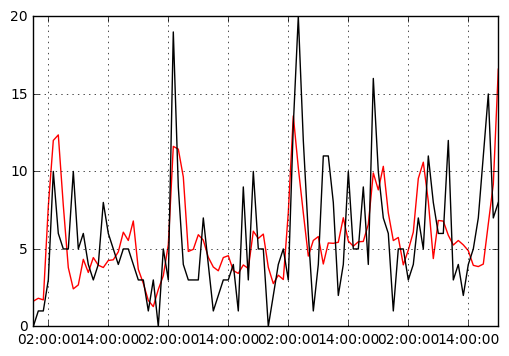

In [7]:
#from IPython.html.widgets import *
#from ipywidgets import widgets
#from IPython.display import display
#from ipywidgets import interact

namereg = []
for r in reg102[1].values:
    namereg.append(str(r))

def plot_for_reg(ypredict,yfact):
    
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.plot(ypredict.index.values, ypredict, color="red", linestyle="solid")
    axes.plot(yfact.index.values, yfact, color="black", linestyle="solid")
    axes.grid()
    plt.show

def f(RegionNumber, HourPredict, CountHoursForDisplay, **kwards):
    
    
    reg2 = data1[data1['region']==int(RegionNumber)]
    reg = reg2[reg2['T']<=CountHoursForDisplay+744]
    namepred = "pred_"+str(HourPredict)
    namefact = "y_Tplus"+str(HourPredict)
    
    ypredict=reg[namepred]
    yfact=reg[namefact]
    
    plot_for_reg(ypredict,yfact, **kwards)

widgets.interact(f, RegionNumber=namereg, HourPredict =(1,6), CountHoursForDisplay=(0, 715, 1))

EEE


In [76]:
from IPython.display import display
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)
text.on_submit(handle_submit)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [77]:
button=widgets.Button(description="AAA")
display(button)

def on_button_clicked(b):
    print "EEE"
    
button.on_click(on_button_clicked)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [83]:
def f(x):
    print(x)
widgets.interact(f,x=10)


10


<function __main__.f>

In [10]:
widgets.interact(f,x=True)

True


In [11]:
widgets.interact(f,x='text')

text


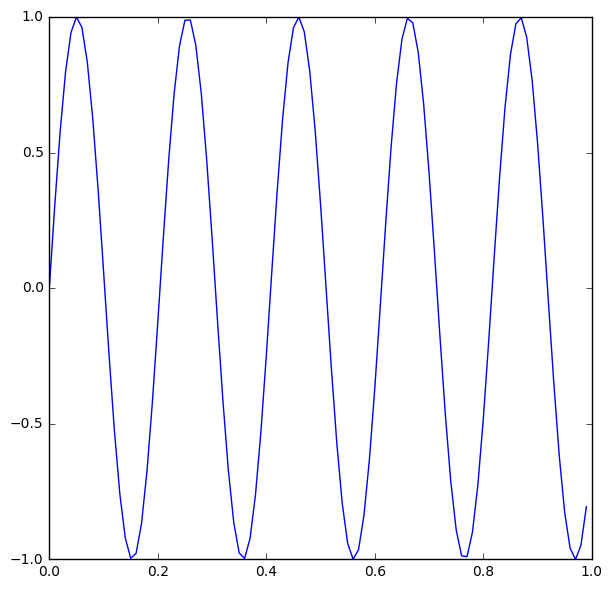

<function __main__.pltsin>

In [79]:
from IPython.html.widgets import *
t = arange(0.0, 1.0, 0.01)

def pltsin(f):
    plt.plot(t,sin(2*pi*t*f))
    plt.show()
interact(pltsin, f=(1,10,0.1))

In [22]:
from IPython.utils.traitlets.
from IPython. utils. traitlets import link
a = FloatText()
b = FloatSlider()
c = FloatProgress()
display(a,b,c)


mylink = link((a, 'value'), (b, 'value'), (c, 'value'))

ImportError: No module named traitlets

sum of trips    1283
dtype: int64
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-74.25559,40.49612,-73.70001,40.91553&bboxSR=4326&imageSR=4326&size=1500,1132&dpi=96&format=png32&f=image


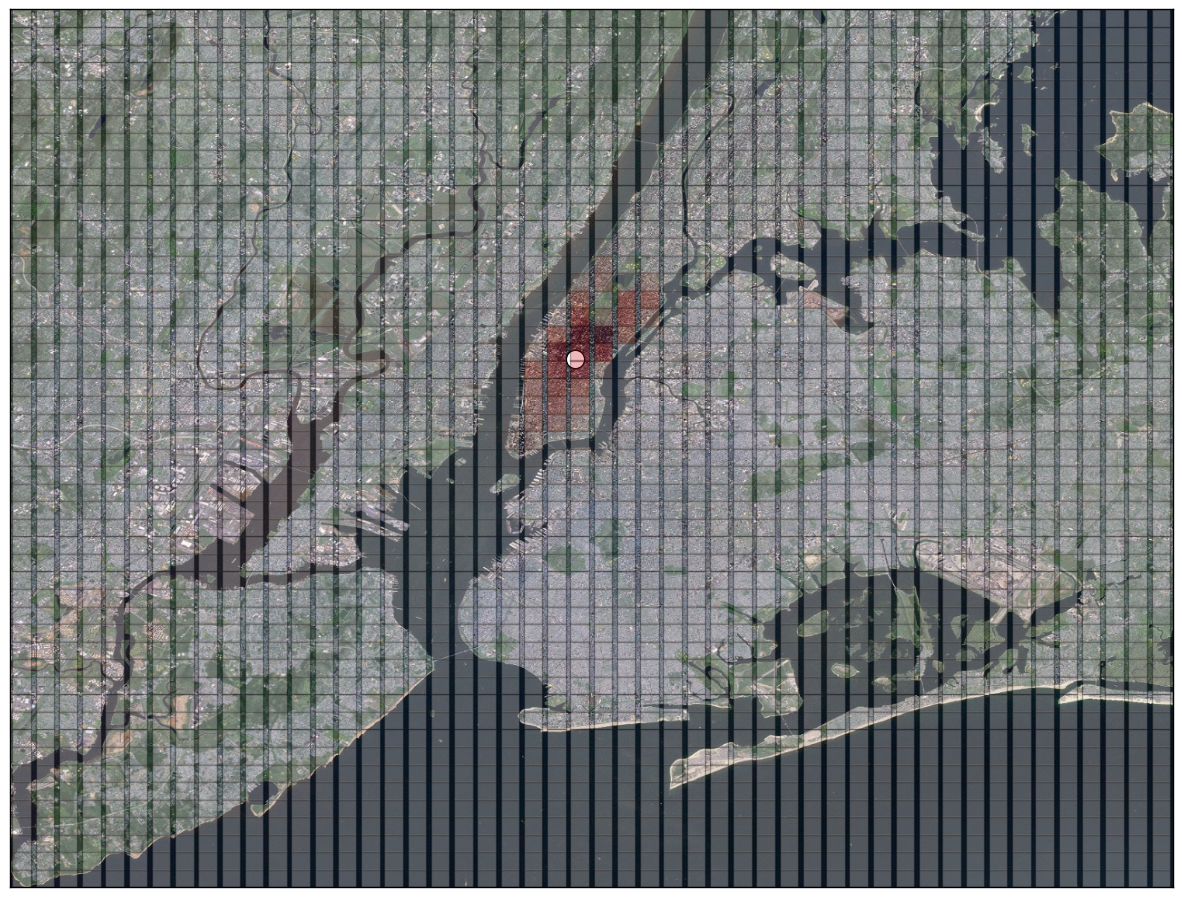

In [19]:
filename = "yellow_tripdata_2016-05.csv"
data = pd.read_csv("agrig_"+filename, sep=",", index_col=False) 

r = data.groupby(['region'])['count of trips'].sum()
temp = pd.DataFrame(data=r.values, index=r.index, columns=["sum of trips"])
print temp[temp["sum of trips"]==0].count()

rs = pd.read_csv("regions.csv", sep=";") 
center_lat_lon = []
for i in range(2500):
    y= (rs[rs.region==i+1].values[0][1]+rs[rs.region==i+1].values[0][2])/2
    x= (rs[rs.region==i+1].values[0][3]+rs[rs.region==i+1].values[0][4])/2
    center_lat_lon.append((i+1,x,y, rs[rs.region==i+1].values[0][3], rs[rs.region==i+1].values[0][4], rs[rs.region==i+1].values[0][1],rs[rs.region==i+1].values[0][2], temp['sum of trips'].loc[i+1]))
    #print rs[rs.region==i].values, region_data['sum of trips'].loc[i]
region_data = pd.DataFrame(data=center_lat_lon, columns=["region","lat_center", "lon_center","lat_min","lat_max","lon_min","lon_max", "sum of trips"])


m1 = Basemap(resolution='c', llcrnrlon=-74.25559,llcrnrlat=40.49612,urcrnrlon=-73.70001,urcrnrlat=40.91553)
#http://server.arcgisonline.com/arcgis/rest/services
figsize(15,15)

x, y = m1(-73.985656,40.748433)
m1.scatter(x,y, 175,marker='o', c="white", alpha=1.0)
x, y = m1(region_data['lon_center'],region_data['lat_center'])
m1.scatter(x,y, 175,marker='s', c=region_data["sum of trips"], cmap=cm.Reds, alpha=0.3)
m1.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
plt.show()

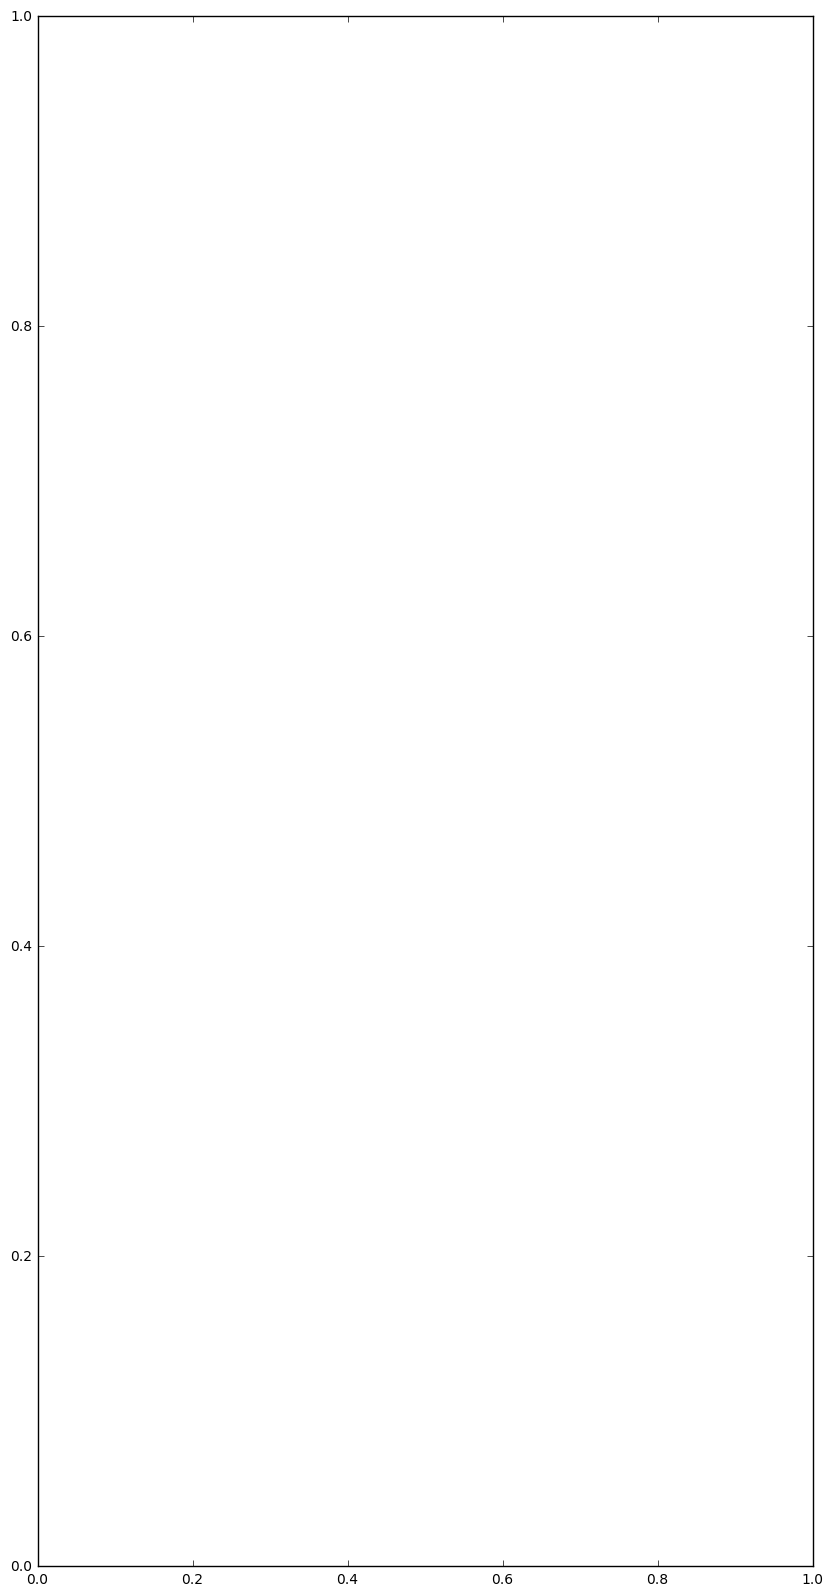

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(10,20))

m = Basemap(resolution='c', # c, l, i, h, f or None
            projection='merc',
            lat_0=54.5, lon_0=-4.36,
            llcrnrlon=-6., llcrnrlat= 49.5, urcrnrlon=2., urcrnrlat=55.2)
plt.show()

In [50]:
dopreg102 = pd.read_csv("102_regions3.csv", sep=";") 
reg102 = pd.read_csv("102_regions.csv", sep=",",header=None) 

In [49]:
import os
import folium

print folium 

longitudeMin = -74.25559
longitudeMax = -73.70001
latitudeMin = 40.49612
latitudeMax = 40.91553

rs = pd.read_csv("regions.csv", sep=";") 
center_lat_lon = []
for i in range(2500):
    y= (rs[rs.region==i+1].values[0][1]+rs[rs.region==i+1].values[0][2])/2
    x= (rs[rs.region==i+1].values[0][3]+rs[rs.region==i+1].values[0][4])/2
    center_lat_lon.append((i+1,x,y, rs[rs.region==i+1].values[0][3], rs[rs.region==i+1].values[0][4], rs[rs.region==i+1].values[0][1],rs[rs.region==i+1].values[0][2]))
region_data = pd.DataFrame(data=center_lat_lon, columns=["region","lat_center", "lon_center","lat_min","lat_max","lon_min","lon_max"])

c1 = ['red', 'blue', 'green', 'black', 'yellow', 'magenta', 'cyan']

m2 = folium.Map(location=[(latitudeMin+latitudeMax)/2., (longitudeMin+longitudeMax)/2.], zoom_start=12)

for j in dopreg102['region']:
    numBoro = dopreg102[dopreg102['region']==j]['AirportAndBoro'].values[0]
    info = "Region: "+str(j)
    folium.features.RectangleMarker(
    bounds=[[region_data[region_data['region']==j]['lat_min'].values[0], region_data[region_data['region']==j]['lon_min'].values[0]], [region_data[region_data['region']==j]['lat_max'].values[0], region_data[region_data['region']==j]['lon_max'].values[0]]],
    color='black',
    fill_color=c1[numBoro],
    popup=info).add_to(m2)
display(m2)

<module 'folium' from 'C:\Anaconda2\lib\site-packages\folium-0.3.0.dev0-py2.7.egg\folium\__init__.pyc'>


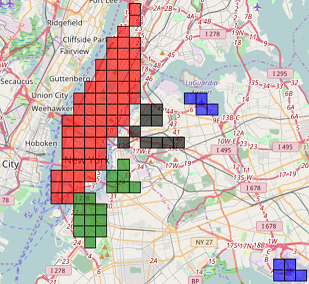

In [39]:
from IPython.display import Image
Image(filename='boro.PNG')

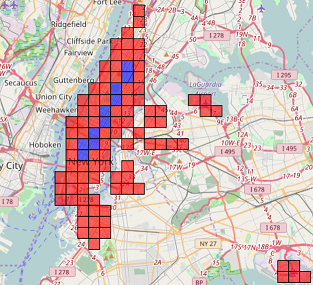

In [40]:
Image(filename='5av.PNG')

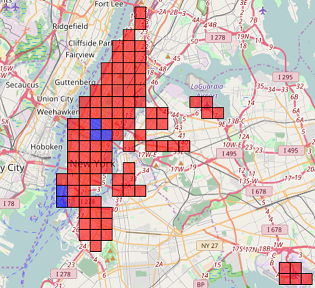

In [41]:
Image(filename='landmark.PNG')

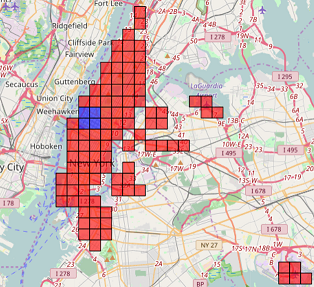

In [42]:
Image(filename='theatre.PNG')

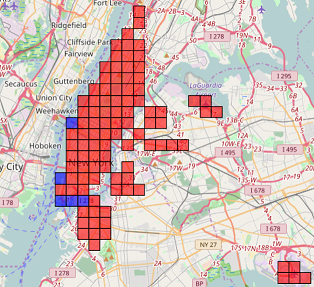

In [43]:
Image(filename='port.PNG')

In [60]:
Parad = pd.to_datetime(["2015-11-11", "2015-11-26", "2015-12-19", "2016-1-6","2016-2-14","2016-3-17","2016-3-27","2016-4-1","2016-4-3","2016-4-9",
"2016-4-10","2016-4-17","2016-4-23","2016-5-7","2016-5-21","2016-6-5"])

In [61]:
Celebr = pd.to_datetime(["2015-11-11", "2015-11-26","2015-12-25","2015-12-31","2016-1-1","2016-1-18","2016-2-14","2016-2-15","2016-3-17","2016-3-27",
"2016-5-30"])
AroundCelebr = pd.to_datetime(["2015-11-25", "2015-12-26","2015-12-27","2015-12-28","2015-12-29","2015-12-30"])

Загрузим предсказания Аримы (которые были получены на данных до апреля, для мая)

In [51]:
file_mas_pred = ['1resultMay.csv','2resultMay.csv','3resultMay.csv']
data_all_pred = pd.DataFrame()
for f in file_mas_pred:
    k=0
    data_h = pd.DataFrame()
    data = pd.read_csv(f, sep=",", index_col=False) 
    data_all_pred = pd.concat([data_all_pred, data])

data_all_pred = data_all_pred.reset_index().drop("index", axis=1)
#data_all = data_all.drop('Unnamed: 0', 1)
composed = []
newrow = []
for row in data_all_pred.itertuples():
    idx, id, y = row
    if idx % 6 == 0:
        if idx:
            composed.append(newrow)
        region, date, hour, _ = id.split("_")
        newrow = map(int, date.split("-"))
        newrow.append(int(hour))
        newrow.append(int(region))
    newrow.append(y)
composed.append(newrow)
composed = pd.DataFrame(data=composed, columns=["year", "month", "day", "hour", "region"] + ["pred_%d" % (i+1) for i in xrange(6)])

загрузим данные с ноября по май

In [52]:
file_mas = ['agrig_yellow_tripdata_2015-11.csv','agrig_yellow_tripdata_2015-12.csv', 'agrig_yellow_tripdata_2016-01.csv','agrig_yellow_tripdata_2016-02.csv','agrig_yellow_tripdata_2016-03.csv','agrig_yellow_tripdata_2016-04.csv','agrig_yellow_tripdata_2016-05.csv']
data_all1 = pd.DataFrame()
dataMain = pd.DataFrame()

j=0
for f in file_mas:
    k=0
    data_h = pd.DataFrame()
    data = pd.read_csv(f, sep=",", index_col=False) 
    dataMain = pd.concat([dataMain, data])

dataMain = dataMain.drop('Unnamed: 0', 1)

for r in reg102[1].index:  
    data_reg = pd.DataFrame(data = dataMain[dataMain['region']==reg102[1][r]])
    data_all1 = pd.concat([data_all1, data_reg])

Соединим данные с предсказаниями аримы

In [55]:
a = pd.merge(data_all1, composed, how='inner', on=['year',  'month',  'day',  'hour',  'region'], left_on=None, right_on=None,
         left_index=False, right_index=False, sort=False, copy=True, indicator=False)
data_all2 = pd.DataFrame(data=a)

In [56]:
print data_all2.head()

   year  month  day  hour  region  count of trips      pred_1      pred_2  \
0  2015     11    1     0    1075              53    1.145008   52.306593   
1  2015     11    1     1    1075             112   52.306593  111.167158   
2  2015     11    1     2    1075              25  111.167158   24.048009   
3  2015     11    1     3    1075              21   24.048009   19.928609   
4  2015     11    1     4    1075              19   19.928609   17.827530   

       pred_3     pred_4     pred_5     pred_6  
0  111.167158  24.048009  19.928609  17.827530  
1   24.048009  19.928609  17.827530  19.747156  
2   19.928609  17.827530  19.747156  34.688116  
3   17.827530  19.747156  34.688116  36.650082  
4   19.747156  34.688116  36.650082  38.641439  


Начнем добавлять признаки. Сначала географические.

In [58]:
data_all_geogr = pd.DataFrame()
for j in dopreg102['region']:
    
    numBoro = dopreg102[dopreg102['region']==j]['AirportAndBoro'].values[0]
    num5av = dopreg102[dopreg102['region']==j]['5av'].values[0]
    numlandmark = dopreg102[dopreg102['region']==j]['landmark'].values[0]
    numtheatre = dopreg102[dopreg102['region']==j]['theatre'].values[0]
    numport = dopreg102[dopreg102['region']==j]['port'].values[0]
    
    data_new_all = data_all2[data_all2['region']==j]
    data_new_all['AirportAndBoro'] = numBoro
    data_new_all['5av'] = num5av
    data_new_all['landmark'] = numlandmark
    data_new_all['theatre'] = numtheatre
    data_new_all['port'] = numport
    
    data_all_geogr = pd.concat([data_all_geogr, data_new_all])


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib

In [59]:
print data_all_geogr.head()

   year  month  day  hour  region  count of trips      pred_1      pred_2  \
0  2015     11    1     0    1075              53    1.145008   52.306593   
1  2015     11    1     1    1075             112   52.306593  111.167158   
2  2015     11    1     2    1075              25  111.167158   24.048009   
3  2015     11    1     3    1075              21   24.048009   19.928609   
4  2015     11    1     4    1075              19   19.928609   17.827530   

       pred_3     pred_4     pred_5     pred_6  AirportAndBoro  5av  landmark  \
0  111.167158  24.048009  19.928609  17.827530               0    0         1   
1   24.048009  19.928609  17.827530  19.747156               0    0         1   
2   19.928609  17.827530  19.747156  34.688116               0    0         1   
3   17.827530  19.747156  34.688116  36.650082               0    0         1   
4   19.747156  34.688116  36.650082  38.641439               0    0         1   

   theatre  port  
0        0     1  
1        0  

Теперь добавим праздники и парады:

In [96]:
df = pd.DataFrame(data=data_all_geogr, columns=['year', 'month', 'day'])
data1 = pd.to_datetime(df)
df['dd'] = data1
df.reset_index(inplace=True)
df = df.set_index('dd')

ParadCol =[]
CelebrCol =[]
AroundCelebrCol=[]

for k in df.index:
    if k in Parad:
        ParadCol.append(1)
    else: ParadCol.append(0)
    if k in Celebr:
        CelebrCol.append(1)
    else: CelebrCol.append(0)    
    if k in AroundCelebr:
        AroundCelebrCol.append(1)
    else: AroundCelebrCol.append(0) 
        
data_all_geogr['weekday'] = df.index.weekday
data_all_geogr['Parad'] = ParadCol
data_all_geogr['Celebr'] = CelebrCol
data_all_geogr['AroundCelebr'] = AroundCelebrCol

In [97]:
data_all = data_all_geogr

In [98]:
print data_all.head()

   year  month  day  hour  region  count of trips      pred_1      pred_2  \
0  2015     11    1     0    1075              53    1.145008   52.306593   
1  2015     11    1     1    1075             112   52.306593  111.167158   
2  2015     11    1     2    1075              25  111.167158   24.048009   
3  2015     11    1     3    1075              21   24.048009   19.928609   
4  2015     11    1     4    1075              19   19.928609   17.827530   

       pred_3     pred_4      ...          pred_6  AirportAndBoro  5av  \
0  111.167158  24.048009      ...       17.827530               0    0   
1   24.048009  19.928609      ...       19.747156               0    0   
2   19.928609  17.827530      ...       34.688116               0    0   
3   17.827530  19.747156      ...       36.650082               0    0   
4   19.747156  34.688116      ...       38.641439               0    0   

   landmark  theatre  port  weekday  Parad  Celebr  AroundCelebr  
0         1        0     

Преобразуем данные:
- добавим тренд, константу, синусы и косинусы;
- 23 сдвига на час назад и 6 сдвигов на день назад (потом нужное количество этих признаков было занесено параметрами в функции регрессий и подбиралось);
- сумма за предыдущие полдня;
- сумма за предыдущие сутки;
- сумма за предыдущую неделю,

затем были убраны данные за первую неделю и признаки: региона, года, месяца, дня месяца, дня недели, часа биннаризованы (причем, все кроме региона оставлены и в качестве вещественных признаков).

Дополнительно были сразу получены столбцы значений на день позже, которые будут являтся целевыми признаки в дальнейшем при обучении регрессий и построении прогнозов.

In [101]:
ind=[]
for i in range(5106):
    ind.append(i+1)

data_main = pd.DataFrame()
for r in reg102[1].index:  
    data_reg = pd.DataFrame(data = data_all[data_all['region']==reg102[1][r]])
    #print reg102[1][r]
    data_reg['T'] = ind
    data_reg['const'] = 1.0
    data_reg['sin1'] =  np.sin(data_reg['T']*2*np.pi*1/168.)
    data_reg['sin2'] =  np.sin(data_reg['T']*2*np.pi*2/168.)
    data_reg['sin3'] =  np.sin(data_reg['T']*2*np.pi*3/168.)
    data_reg['sin4'] =  np.sin(data_reg['T']*2*np.pi*4/168.)
    data_reg['sin5'] =  np.sin(data_reg['T']*2*np.pi*5/168.)

    data_reg['cos1'] =  np.cos(data_reg['T']*2*np.pi/168.)
    data_reg['cos2'] =  np.cos(data_reg['T']*2*np.pi*2/168.)
    data_reg['cos3'] =  np.cos(data_reg['T']*2*np.pi*3/168.)
    data_reg['cos4'] =  np.cos(data_reg['T']*2*np.pi*4/168.)
    data_reg['cos5'] =  np.cos(data_reg['T']*2*np.pi*5/168.)
    
    data_reg['y_T'] =  data_reg['count of trips']
    data_reg = data_reg.drop('count of trips',1)
    yt = data_reg['y_T'].as_matrix().T
    
    
    for kk in range(23):
        a = np.roll(yt, kk+1)
        colname = 'y_Tminus'+str(kk+1)
        data_reg[colname] = a

    for kkd in range(6):
        a = np.roll(yt, 24*(kkd+1))
        colname = 'y_Tminus24*'+str(kkd+1)
        data_reg[colname] = a
    #сумма за предыдущие полдня
    colname = "SumHalfDay"
    b = np.zeros(5106)
    for i7 in range(12):
        b = b+np.roll(yt, i7+1)      
    data_reg[colname] = b

    #сумма за предыдущие сутки
    colname = "SumDay"
    b = np.zeros(5106)
    for i7 in range(24):
        b = b+np.roll(yt, i7+1)      
    data_reg[colname] = b

    #сумма за предыдущую неделю
    colname = "SumWeek"
    b = np.zeros(5106)
    for i7 in range(168):
        b = b+np.roll(yt, i7+1)      
    data_reg[colname] = b
        
        #
    for num in range(6):        
        a = np.roll(yt, -(num+1))
        colname = 'y_Tplus'+str(num+1)
        data_reg[colname] = a
    data_main = pd.concat([data_main, data_reg[data_reg['T']>168]])
data_main = data_main[data_main['T']<5827]

data_main = data_main[data_main['T']<5827]
df2 = pd.get_dummies(data_main['region'])
data_main[df2.columns] = df2
data_main = data_main.drop('region', 1)
    
dfhour = pd.get_dummies(data_main['hour'], prefix='hour')
dfday = pd.get_dummies(data_main['day'], prefix='day')
dfmonth = pd.get_dummies(data_main['month'], prefix='month')
dfweekday = pd.get_dummies(data_main['weekday'], prefix='weekday')
dfAirportAndBoro = pd.get_dummies(data_main['AirportAndBoro'], prefix='AirportAndBoro')

data_main[dfhour.columns] = dfhour
data_main[dfday.columns] = dfday
data_main[dfmonth.columns] = dfmonth
data_main[dfweekday.columns] = dfweekday
data_main[dfAirportAndBoro.columns] = dfAirportAndBoro

data_main = data_main.drop('AirportAndBoro', 1)

Так выглядят колонки общих данных (сейчас они содержат и те признаки на которые мы будет обучать регрессию 'y_Tplus1' 'y_Tplus2' 'y_Tplus3'  'y_Tplus4' 'y_Tplus5' 'y_Tplus6')

In [102]:
print data_main.columns.values

['year' 'month' 'day' 'hour' 'pred_1' 'pred_2' 'pred_3' 'pred_4' 'pred_5'
 'pred_6' '5av' 'landmark' 'theatre' 'port' 'weekday' 'Parad' 'Celebr'
 'AroundCelebr' 'T' 'const' 'sin1' 'sin2' 'sin3' 'sin4' 'sin5' 'cos1'
 'cos2' 'cos3' 'cos4' 'cos5' 'y_T' 'y_Tminus1' 'y_Tminus2' 'y_Tminus3'
 'y_Tminus4' 'y_Tminus5' 'y_Tminus6' 'y_Tminus7' 'y_Tminus8' 'y_Tminus9'
 'y_Tminus10' 'y_Tminus11' 'y_Tminus12' 'y_Tminus13' 'y_Tminus14'
 'y_Tminus15' 'y_Tminus16' 'y_Tminus17' 'y_Tminus18' 'y_Tminus19'
 'y_Tminus20' 'y_Tminus21' 'y_Tminus22' 'y_Tminus23' 'y_Tminus24*1'
 'y_Tminus24*2' 'y_Tminus24*3' 'y_Tminus24*4' 'y_Tminus24*5' 'y_Tminus24*6'
 'SumHalfDay' 'SumDay' 'SumWeek' 'y_Tplus1' 'y_Tplus2' 'y_Tplus3'
 'y_Tplus4' 'y_Tplus5' 'y_Tplus6' 1075 1076 1077 1125 1126 1127 1128 1129
 1130 1131 1132 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183
 1184 1221 1222 1223 1224 1225 1227 1228 1229 1230 1231 1232 1233 1234 1235
 1272 1273 1274 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1326 13

Разбиваем выборку на обучение и тест (данные до мая и данные за май)

In [103]:
date43023 = data_main[(data_main['month']==4)&(data_main['day']==30)&(data_main['hour']==23)]['T'].mean()
date53117 = data_main[(data_main['month']==5)&(data_main['day']==31)&(data_main['hour']==17)]['T'].mean()

data_mainTrain = data_main[data_main['T']<date43023]
data_mainmay = data_main[(data_main['T']>=date43023)&(data_main['T']<=date53117)]

In [104]:
Kmas=['y_Tminus1','y_Tminus2','y_Tminus3','y_Tminus4','y_Tminus5','y_Tminus6',
 'y_Tminus7','y_Tminus8','y_Tminus9','y_Tminus10','y_Tminus11','y_Tminus12',
 'y_Tminus13','y_Tminus14','y_Tminus15','y_Tminus16','y_Tminus17',
 'y_Tminus18','y_Tminus19','y_Tminus20','y_Tminus21','y_Tminus22',
 'y_Tminus23']

Kdmas=['y_Tminus24*1','y_Tminus24*2','y_Tminus24*3','y_Tminus24*4', 'y_Tminus24*5','y_Tminus24*6']

ypred=['pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5', 'pred_6']

строим функцию для определения параметров регрессий:
Будем исключать все ненужные признаки (все предсказания и все целевые) и затем в цикле будем добавлять столбец предсказаний аримы в признаки и столбец реальных значений на нужный час в перед, в качестве цели.

In [105]:
#alpha = [1.0, 0.5, 0.1, 0.05]
#alpha = [1.0]

def REGRparam(regressor, K, Kd, data_mainTrain, data_mainmay, countofday):
    columns = ['y_Tplus1','y_Tplus2','y_Tplus3','y_Tplus4','y_Tplus5','y_Tplus6', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5', 'pred_6']
    col = np.hstack((Kmas[K:], Kdmas[Kd:]))  
    columns  = np.hstack((columns, col))  
    
    data_mainTrain1 = data_mainTrain.drop(columns, 1)
    data_mainmay1 = data_mainmay.drop(columns, 1)
    
    PredictMay = pd.DataFrame(data = data_mainmay1)
    sumall = 0
    for num in range(6):
        yy = num+1   
        ypred = 'pred_'+str(yy)
        ypredlast = 'pred_'+str(yy-1)
        if num<>0:
            data_mainTrain1 = data_mainTrain1.drop(ypredlast, 1)        
            data_mainmay1 = data_mainmay1.drop(ypredlast, 1)  
        
        data_mainTrain1[ypred] = data_mainTrain[ypred]        
        data_mainmay1[ypred]  = data_mainmay[ypred] 
        
        col_pred = 'y_Tplus'+str(yy)
        
        print yy   
        y_data_mainTrain1 = data_mainTrain[col_pred]
        y_mainmay1 = data_mainmay[col_pred]
        
        regressor.fit(data_mainTrain1, y_data_mainTrain1)
        numPred = "PredictMay"+str(yy)+"hour"
        PredictMay[numPred] = regressor.predict(data_mainmay1)
        err = sum(abs(regressor.predict(data_mainmay1)-y_mainmay1))
        sumall = sumall + err
    Q = " K="+str(K)+" Kd="+str(Kd)+" Q:" + str(sumall/(countofday*102*6))
    print Q
    return PredictMay

In [108]:
lasso_regressor = Lasso(1.0)
Lasso1 = REGRparam(lasso_regressor, 11, 6, data_mainTrain, data_mainmay, 739)

1
2
3
4
5
6
 K=11 Kd=6 Q:30.8466357201


In [189]:
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
regressorGBR3 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=10, random_state=47, loss='ls')
GBR3 = REGRparam(regressorGBR3, 11, 6, data_mainTrain, data_mainmay, 739)

1
2
3
4
5
6
 K=11 Kd=6 Q:18.5183667389


In [190]:
file_mas_pred2 = ['1resultJune.csv','2resultJune.csv','3resultJune.csv']
data_all_pred2 = pd.DataFrame()
for f in file_mas_pred2:
    k=0
    data_h = pd.DataFrame()
    data = pd.read_csv(f, sep=",", index_col=False) 
    data_all_pred2 = pd.concat([data_all_pred2, data])

data_all_pred2 = data_all_pred2.reset_index().drop("index", axis=1)
#data_all = data_all.drop('Unnamed: 0', 1)
composed2 = []
newrow = []
for row in data_all_pred.itertuples():
    idx, id, y = row
    if idx % 6 == 0:
        if idx:
            composed2.append(newrow)
        region, date, hour, _ = id.split("_")
        newrow = map(int, date.split("-"))
        newrow.append(int(hour))
        newrow.append(int(region))
    newrow.append(y)
composed2.append(newrow)
composed2 = pd.DataFrame(data=composed2, columns=["year", "month", "day", "hour", "region"] + ["pred_%d" % (i+1) for i in xrange(6)])

In [191]:
file_mas2 = ['agrig_yellow_tripdata_2015-11.csv','agrig_yellow_tripdata_2015-12.csv', 'agrig_yellow_tripdata_2016-01.csv','agrig_yellow_tripdata_2016-02.csv','agrig_yellow_tripdata_2016-03.csv','agrig_yellow_tripdata_2016-04.csv','agrig_yellow_tripdata_2016-05.csv','agrig_yellow_tripdata_2016-06.csv']
data_all12 = pd.DataFrame()
dataMain2 = pd.DataFrame()

j=0
for f in file_mas2:
    k=0
    data_h = pd.DataFrame()
    data = pd.read_csv(f, sep=",", index_col=False) 
    dataMain2 = pd.concat([dataMain2, data])

dataMain2 = dataMain2.drop('Unnamed: 0', 1)

for r in reg102[1].index:  
    data_reg = pd.DataFrame(data = dataMain[dataMain['region']==reg102[1][r]])
    data_all12 = pd.concat([data_all12, data_reg])

a2 = pd.merge(data_all12, composed2, how='inner', on=['year',  'month',  'day',  'hour',  'region'], left_on=None, right_on=None,
         left_index=False, right_index=False, sort=False, copy=True, indicator=False)
data_all3 = pd.DataFrame(data=a2)

In [193]:
data_all_geogr = pd.DataFrame()
for j in dopreg102['region']:
    
    numBoro = dopreg102[dopreg102['region']==j]['AirportAndBoro'].values[0]
    num5av = dopreg102[dopreg102['region']==j]['5av'].values[0]
    numlandmark = dopreg102[dopreg102['region']==j]['landmark'].values[0]
    numtheatre = dopreg102[dopreg102['region']==j]['theatre'].values[0]
    numport = dopreg102[dopreg102['region']==j]['port'].values[0]
    
    data_new_all = data_all3[data_all3['region']==j]
    data_new_all['AirportAndBoro'] = numBoro
    data_new_all['5av'] = num5av
    data_new_all['landmark'] = numlandmark
    data_new_all['theatre'] = numtheatre
    data_new_all['port'] = numport
    
    data_all_geogr = pd.concat([data_all_geogr, data_new_all])
    
df = pd.DataFrame(data=data_all_geogr, columns=['year', 'month', 'day'])
data1 = pd.to_datetime(df)
df['dd'] = data1
df.reset_index(inplace=True)
df = df.set_index('dd')

ParadCol =[]
CelebrCol =[]
AroundCelebrCol=[]

for k in df.index:
    if k in Parad:
        ParadCol.append(1)
    else: ParadCol.append(0)
    if k in Celebr:
        CelebrCol.append(1)
    else: CelebrCol.append(0)    
    if k in AroundCelebr:
        AroundCelebrCol.append(1)
    else: AroundCelebrCol.append(0) 
        
data_all_geogr['weekday'] = df.index.weekday
data_all_geogr['Parad'] = ParadCol
data_all_geogr['Celebr'] = CelebrCol
data_all_geogr['AroundCelebr'] = AroundCelebrCol

data_allj = data_all_geogr

ind=[]
for i in range(5106):
    ind.append(i+1)

data_mainj = pd.DataFrame()
for r in reg102[1].index:  
    data_reg = pd.DataFrame(data = data_allj[data_allj['region']==reg102[1][r]])
    #print reg102[1][r]
    data_reg['T'] = ind
    data_reg['const'] = 1.0
    data_reg['sin1'] =  np.sin(data_reg['T']*2*np.pi*1/168.)
    data_reg['sin2'] =  np.sin(data_reg['T']*2*np.pi*2/168.)
    data_reg['sin3'] =  np.sin(data_reg['T']*2*np.pi*3/168.)
    data_reg['sin4'] =  np.sin(data_reg['T']*2*np.pi*4/168.)
    data_reg['sin5'] =  np.sin(data_reg['T']*2*np.pi*5/168.)

    data_reg['cos1'] =  np.cos(data_reg['T']*2*np.pi/168.)
    data_reg['cos2'] =  np.cos(data_reg['T']*2*np.pi*2/168.)
    data_reg['cos3'] =  np.cos(data_reg['T']*2*np.pi*3/168.)
    data_reg['cos4'] =  np.cos(data_reg['T']*2*np.pi*4/168.)
    data_reg['cos5'] =  np.cos(data_reg['T']*2*np.pi*5/168.)
    
    data_reg['y_T'] =  data_reg['count of trips']
    data_reg = data_reg.drop('count of trips',1)
    yt = data_reg['y_T'].as_matrix().T
    
    
    for kk in range(23):
        a = np.roll(yt, kk+1)
        colname = 'y_Tminus'+str(kk+1)
        data_reg[colname] = a

    for kkd in range(6):
        a = np.roll(yt, 24*(kkd+1))
        colname = 'y_Tminus24*'+str(kkd+1)
        data_reg[colname] = a
    #сумма за предыдущие полдня
    colname = "SumHalfDay"
    b = np.zeros(5106)
    for i7 in range(12):
        b = b+np.roll(yt, i7+1)      
    data_reg[colname] = b

    #сумма за предыдущие сутки
    colname = "SumDay"
    b = np.zeros(5106)
    for i7 in range(24):
        b = b+np.roll(yt, i7+1)      
    data_reg[colname] = b

    #сумма за предыдущую неделю
    colname = "SumWeek"
    b = np.zeros(5106)
    for i7 in range(168):
        b = b+np.roll(yt, i7+1)      
    data_reg[colname] = b
        
        #
    for num in range(6):        
        a = np.roll(yt, -(num+1))
        colname = 'y_Tplus'+str(num+1)
        data_reg[colname] = a
    data_mainj = pd.concat([data_mainj, data_reg[data_reg['T']>168]])
data_mainj = data_mainj[data_mainj['T']<5827]


df2 = pd.get_dummies(data_mainj['region'])
data_mainj[df2.columns] = df2
data_mainj = data_mainj.drop('region', 1)
    
dfhour = pd.get_dummies(data_mainj['hour'], prefix='hour')
dfday = pd.get_dummies(data_mainj['day'], prefix='day')
dfmonth = pd.get_dummies(data_mainj['month'], prefix='month')
dfweekday = pd.get_dummies(data_mainj['weekday'], prefix='weekday')
dfAirportAndBoro = pd.get_dummies(data_mainj['AirportAndBoro'], prefix='AirportAndBoro')

data_mainj[dfhour.columns] = dfhour
data_mainj[dfday.columns] = dfday
data_mainj[dfmonth.columns] = dfmonth
data_mainj[dfweekday.columns] = dfweekday
data_mainj[dfAirportAndBoro.columns] = dfAirportAndBoro

data_mainj = data_mainj.drop('AirportAndBoro', 1)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib

In [194]:
date53123 = data_mainj[(data_mainj['month']==5)&(data_mainj['day']==31)&(data_mainj['hour']==23)]['T'].mean()
data_mainTrain2 = data_mainj[data_mainj['T']<date53123]
data_mainjune2 = data_mainj[data_mainj['T']>=date53123]

Kmas=['y_Tminus1','y_Tminus2','y_Tminus3','y_Tminus4','y_Tminus5','y_Tminus6',
 'y_Tminus7','y_Tminus8','y_Tminus9','y_Tminus10','y_Tminus11','y_Tminus12',
 'y_Tminus13','y_Tminus14','y_Tminus15','y_Tminus16','y_Tminus17',
 'y_Tminus18','y_Tminus19','y_Tminus20','y_Tminus21','y_Tminus22',
 'y_Tminus23']

Kdmas=['y_Tminus24*1','y_Tminus24*2','y_Tminus24*3','y_Tminus24*4', 'y_Tminus24*5','y_Tminus24*6']

ypred=['pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5', 'pred_6']

In [195]:
#alpha = [1.0, 0.5, 0.1, 0.05]
#alpha = [1.0]

def REGRparam2(regressor, K, Kd, data_mainTrain, data_mainmay, countofday):
    columns = ['y_Tplus1','y_Tplus2','y_Tplus3','y_Tplus4','y_Tplus5','y_Tplus6', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5', 'pred_6']
    col = np.hstack((Kmas[K:], Kdmas[Kd:]))  
    columns  = np.hstack((columns, col))  
    
    data_mainTrain1 = data_mainTrain.drop(columns, 1)
    data_mainmay1 = data_mainmay.drop(columns, 1)
    
    PredictMay = pd.DataFrame(data = data_mainmay1)
    sumall = 0
    for num in range(6):
        yy = num+1   
        ypred = 'pred_'+str(yy)
        ypredlast = 'pred_'+str(yy-1)
        if num<>0:
            data_mainTrain1 = data_mainTrain1.drop(ypredlast, 1)        
            data_mainmay1 = data_mainmay1.drop(ypredlast, 1)  
        
        data_mainTrain1[ypred] = data_mainTrain[ypred]        
        data_mainmay1[ypred]  = data_mainmay[ypred] 
        
        col_pred = 'y_Tplus'+str(yy)
        
        print yy   
        y_data_mainTrain1 = data_mainTrain[col_pred]
        y_mainmay1 = data_mainmay[col_pred]
        
        regressor.fit(data_mainTrain1, y_data_mainTrain1)
        numPred = "PredictJune"+str(yy)+"hour"
        PredictMay[numPred] = regressor.predict(data_mainmay1)
        err = sum(abs(regressor.predict(data_mainmay1)-y_mainmay1))
        sumall = sumall + err
    Q = " K="+str(K)+" Kd="+str(Kd)+" Q:" + str(sumall/(countofday*102*6))
    print Q
    return PredictMay

In [45]:
regressorGBRJune = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=10, random_state=47, loss='ls')
GBRjune = REGRparam2(regressorGBRJune, 11, 6, data_mainTrain2, data_mainjune2, 715)

1
2
3
4
5
6
 K=11 Kd=6 Q:18.5738160815


In [46]:
#geoID, histEndDay, histEndHour, step, y
junenew=pd.DataFrame()
rend=pd.DataFrame()
for r in reg102[1].index: 
    region = reg102[1][r]
    #print region
    data_reg = pd.DataFrame(data = GBRjune[GBRjune[region]==1])
    data_reg1 = pd.DataFrame(data=data_reg, columns=['year','month','day','hour', 'PredictJune1hour', 'PredictJune2hour', 'PredictJune3hour', 'PredictJune4hour', 'PredictJune5hour', 'PredictJune6hour'])
    df = pd.DataFrame(data=data_reg1, columns=['year', 'month', 'day'])
    df1 = pd.to_datetime(df)
    data_reg1['data'] = df1
    #print data_reg1
    
    for i in range(6):
        #print region
        yy=i+1
        namepred = "PredictJune"+str(yy)+"hour"
        temppd = pd.DataFrame()        
        temppd['histEndDay'] = data_reg1['data']
        temppd['histEndHour'] = data_reg1['hour']
        temppd['geoID'] = region
        temppd['step'] = yy
        temppd['y'] = data_reg1[namepred]
        rend = pd.concat([rend, temppd])

In [47]:
rend = rend[['geoID','histEndDay', 'histEndHour','step','y']]
rend['geoID'] = pd.DataFrame(data=rend['geoID'], dtype='str')
rend['histEndDay'] = pd.DataFrame(data=rend['histEndDay'], dtype='str')
rend['histEndHour'] = pd.DataFrame(data=rend['histEndHour'], dtype='str')
rend['step'] = pd.DataFrame(data=rend['step'], dtype='str')
dd = rend['geoID'].str.cat(rend['histEndDay'], sep="_").str.cat(rend['histEndHour'], sep="_").str.cat(rend['step'], sep="_")
neww = pd.DataFrame() 
neww["id"] = dd
neww["y"] = rend["y"]
neww.to_csv("result5weekGBR.csv", sep=',', index=False)

Эти результты были отправлены в kaggle https://inclass.kaggle.com/submissions/4045977/4045977.zip